# Logistic Regression

## Import Libraries

In [45]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# classification model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Functions

Here we have some functions created to facilitate the modeling phase:

In [46]:
def xy_split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

### Model Performance

In [47]:
def metrics_class(actual, predicted):
    kappa = cohen_kappa_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc_score = roc_auc_score(actual, predicted)
    
    index = ['Cohen Kappa Score', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC Score']
    metrics = pd.Series([kappa, accuracy, precision, recall, f1, auc_score], index=index)
    return metrics.round(2)

In [48]:
def plot_cm(actual, prediction):
    cm = confusion_matrix(actual, prediction)
    # Visualize confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Set2_r', fmt='g', ax=ax)

    # Set axis labels and title
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.tight_layout()



### Feature Importance

In [49]:
def plot_importance(list):
    plt.figure(figsize=(18,8))
    plt.suptitle('Feature Importance Scores', y=0.95)
    plot = sns.barplot(x = list.iloc[:,0], y = list.index)
    return plot

## Model

In [50]:
def classify_log(X, y):
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    model = LogisticRegression(random_state=1, multi_class='ovr')
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    summary = pd.DataFrame(np.abs(importance.round(2)), columns=['importance'], index=X.columns)
    summary = summary.sort_values('importance', ascending=False)
    prediction = model.predict(X_test)
    return prediction, summary

## Load Datasets

### Original Dataset

In [51]:
X = df = pd.read_csv(r'./../data/X.csv')
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,2,2,1,0,0,1,0,1,0,1,0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1,1,1,0,0,1,0,1,0,0,1
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0,2,1,1,0,0,0,1,1,0,0,1
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1,2,1,0,0,1,0,1,0,1,0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1,1,1,0,0,1,0,1,0,0,1


In [52]:
X.shape

(17976, 20)

In [53]:
y = df = pd.read_csv(r'./../data/y.csv')
y.head()

,offer_accepted
0,No
1,No
2,No
3,No
4,No


In [54]:
y_int = pd.Series(y.offer_accepted)
y_int.unique()

array(['No', 'Yes'], dtype=object)

In [55]:
y_int = y_int.apply(lambda x: 0 if x == 'No' else 1)
y_int

0        0
1        0
2        0
3        0
4        0
        ..
17971    0
17972    0
17973    0
17974    0
17975    0
Name: offer_accepted, Length: 17976, dtype: int64

In [56]:
y_int.value_counts()

offer_accepted
0    16955
1     1021
Name: count, dtype: int64

In [57]:
# Apply Transformation on X
independents = X.copy() # make a separate df to preserve the column headers

transformer = StandardScaler().fit(independents)
standard_x = transformer.transform(independents)
X = pd.DataFrame(standard_x)
X.columns = independents.columns # put the column headers back
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,1.215460,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,-0.007894,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,-0.007894,1.404533,-0.707372,-0.70198,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,1.215460,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,-0.007894,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147


#### X Variation: Remove 4 columns of Quarter Balances

In [58]:
X_avgbal = X.drop(columns=(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']))
X_avgbal

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.410295,1.215460,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-0.005039,-0.007894,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,1.410295,-0.007894,1.404533,-0.707372,-0.70198,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,-0.005039,1.215460,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,-0.005039,-0.007894,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,-0.541352,-1.133443,-0.476212,1.346760,-2.206799,1.410295,-1.231249,-0.711980,1.413683,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
17972,-0.541352,1.375766,-0.476212,-0.447855,-0.256976,1.410295,-1.231249,-0.711980,1.413683,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
17973,-0.541352,0.121161,-0.476212,0.449452,0.418896,1.410295,-1.231249,-0.711980,1.413683,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
17974,-0.541352,2.630370,1.863330,-1.345162,0.233335,-0.005039,-0.007894,-0.711980,1.413683,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147


### SMOTE Data

In [59]:
smote_data = pd.read_csv(r'./../data/oversampled_data.csv')

In [60]:
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33910 entries, 0 to 33909
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bank_accounts_open        33910 non-null  float64
 1   credit_cards_held         33910 non-null  float64
 2   homes_owned               33910 non-null  float64
 3   household_size            33910 non-null  float64
 4   average_balance           33910 non-null  float64
 5   q1_balance                33910 non-null  float64
 6   q2_balance                33910 non-null  float64
 7   q3_balance                33910 non-null  float64
 8   q4_balance                33910 non-null  float64
 9   income_level              33910 non-null  float64
 10  credit_rating             33910 non-null  float64
 11  reward_Air Miles          33910 non-null  float64
 12  reward_Cash Back          33910 non-null  float64
 13  reward_Points             33910 non-null  float64
 14  mailer

In [61]:
X_sm = smote_data.drop('offer_accepted', axis=1)
X_sm

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,-0.007894,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,1.575537,0.365992,1.406778,1.171654,-2.006040,-1.383443,-1.399945,-1.216592,-1.143719,-1.144176,0.230839,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,1.354744,-1.354744
33906,-0.541352,0.121161,-0.476212,-1.339703,0.509354,-0.090918,1.061438,0.733175,-0.216821,-1.420373,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
33907,-0.541352,-0.742960,-0.476212,-1.345162,0.100980,1.500388,0.608086,-0.670130,-1.245289,-0.445548,-0.850492,-0.711980,1.413683,-0.701980,-0.983886,0.983886,-2.391127,2.391127,0.703352,-0.703352
33908,-0.541352,0.121161,-0.476212,0.207690,0.117587,0.101837,0.098037,-0.168242,0.268133,0.376295,-0.337504,-0.711980,-0.707372,1.424543,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744


In [62]:
y_sm = smote_data.iloc[:, -1]
y_sm = y_sm.map({'No': 0, 'Yes': 1})
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
33905    1
33906    1
33907    1
33908    1
33909    1
Name: offer_accepted, Length: 33910, dtype: int64

#### X Variation: Remove 4 columns of Quarter Balances

In [63]:
# Remove the quarterly balances to eliminate multicollinearity
Xsm_avgbal = X_sm.drop(columns=(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']))
Xsm_avgbal

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,income_level,credit_rating,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.410295,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,1.410295,-0.007894,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,-0.005039,1.215460,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,-0.005039,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,1.575537,0.365992,1.406778,1.171654,-2.006040,-1.144176,0.230839,1.404533,-0.707372,-0.701980,-0.983886,0.983886,0.418213,-0.418213,1.354744,-1.354744
33906,-0.541352,0.121161,-0.476212,-1.339703,0.509354,-1.420373,-0.007894,1.404533,-0.707372,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
33907,-0.541352,-0.742960,-0.476212,-1.345162,0.100980,-0.445548,-0.850492,-0.711980,1.413683,-0.701980,-0.983886,0.983886,-2.391127,2.391127,0.703352,-0.703352
33908,-0.541352,0.121161,-0.476212,0.207690,0.117587,0.376295,-0.337504,-0.711980,-0.707372,1.424543,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744


### Add random variable in X
- This variable will be useful when checking for feature importance. Every variable below it could most likely be dropped.

In [64]:
X['random'] = np.random.random(size=len(X))
X_avgbal['random'] = np.random.random(size=len(X_avgbal))
X_sm['random'] = np.random.random(size=len(X_sm))
Xsm_avgbal['random'] = np.random.random(size=len(Xsm_avgbal))

In [65]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

### X-y Split : SMOTE X Variation

In [66]:
Xsmavg_train, Xsmavg_test, ysmavg_train, ysmavg_test = train_test_split(X_avgbal, y_int, test_size=0.3, random_state=100) # no quarterly balance

## Logistic Regression

### Original Data

In [67]:
X_train, X_test, y_train, y_test = xy_split(X, y_int)

In [68]:
#Checking the number of records
print(X_train.shape, len(y_train))
print(X_test.shape, len(y_test))

(12583, 21) 12583
(5393, 21) 5393


In [69]:
log_pred, importance_log = classify_log(X, y_int)
importance_log

,importance
credit_rating,0.73
income_level,0.34
mailer_type_Postcard,0.24
mailer_type_Letter,0.24
reward_Cash Back,0.24
reward_Air Miles,0.18
random,0.16
q1_balance,0.09
reward_Points,0.06
household_size,0.06


<Axes: xlabel='importance'>

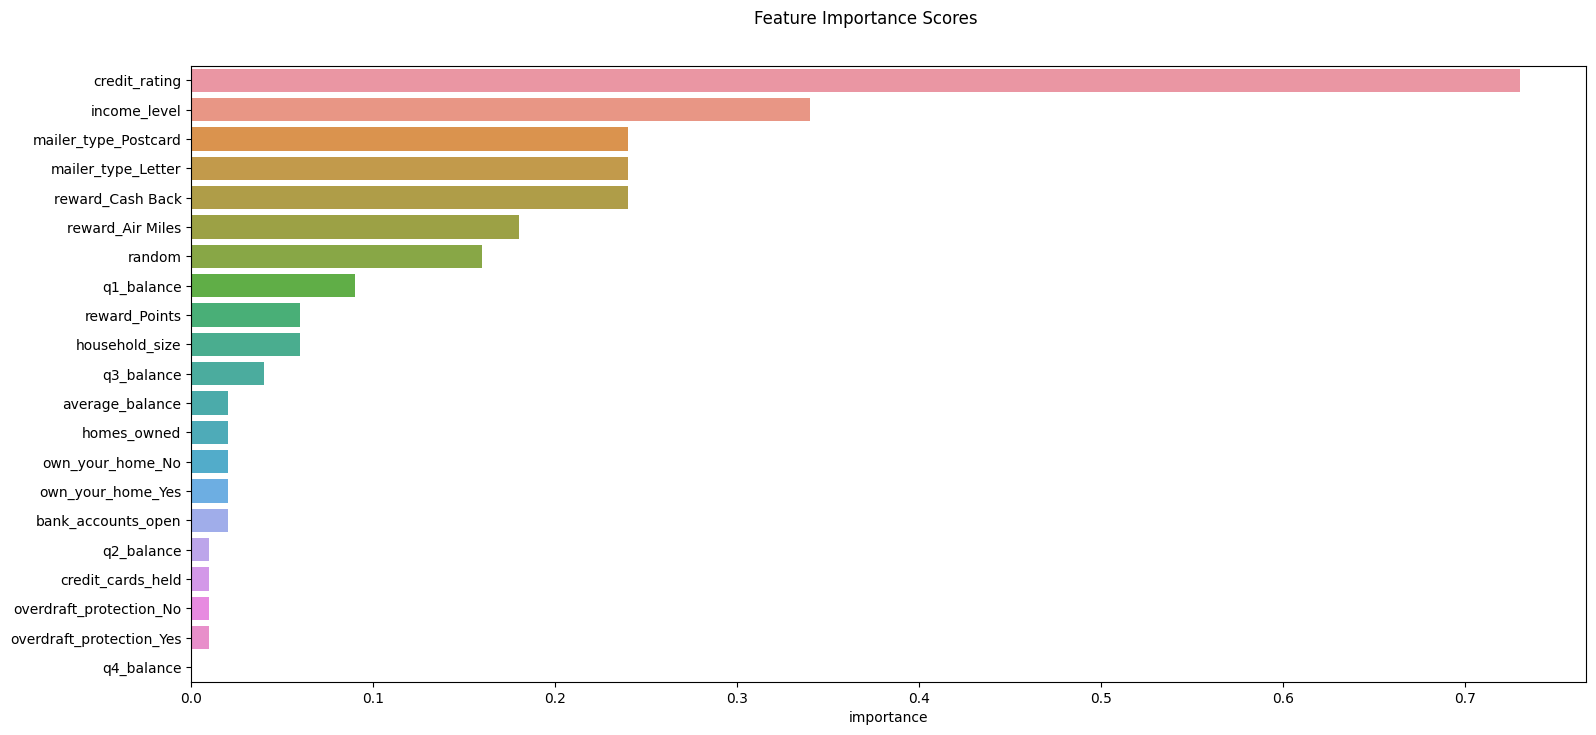

In [70]:
# Logistic Regression Feature Importance Scores
plot_importance(importance_log)

In [71]:
log_metrics = metrics_class(y_test, log_pred)
log_metrics

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

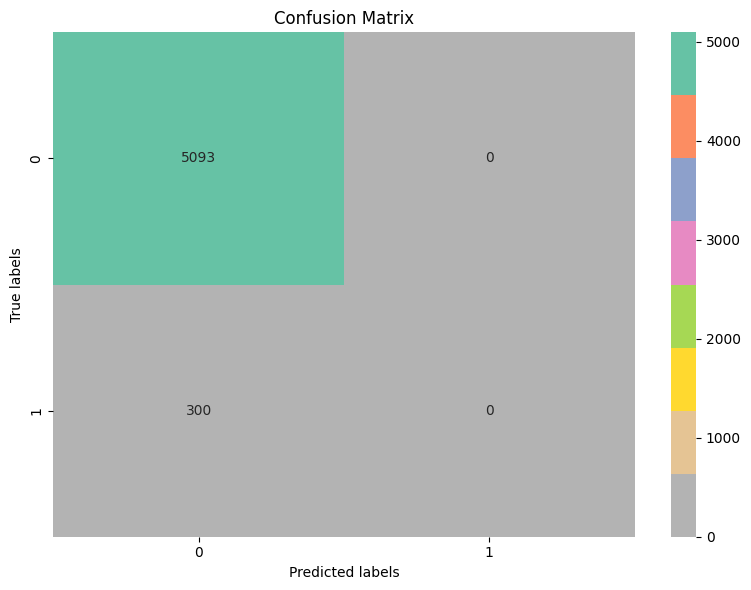

In [72]:
plot_cm(y_test, log_pred)

In [73]:
# plotting results
results = pd.DataFrame()
results['actual'] = y_test
results['prediction'] = log_pred
results.head()

,actual,prediction
16642,0,0
17638,0,0
17710,0,0
11154,0,0
11369,0,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<Axes: xlabel='actual', ylabel='prediction'>

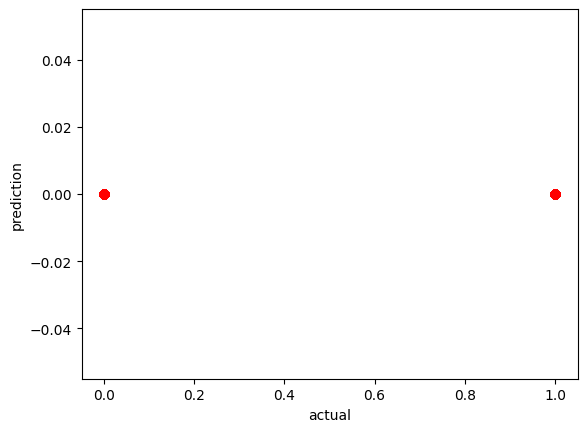

In [74]:
sns.regplot(x = results.actual, y = results.prediction, logistic=True, color='red')

### Original with X Variation: Remove 4 columns of Quarter Balances

In [75]:
Xavg_train, Xavg_test, yavg_train, yavg_test = xy_split(X_avgbal, y_int)

In [76]:
log_pred_avg, importance_log_avg = classify_log(X_avgbal, y_int)
importance_log_avg

,importance
credit_rating,0.73
income_level,0.33
reward_Cash Back,0.24
mailer_type_Postcard,0.24
mailer_type_Letter,0.24
reward_Air Miles,0.18
random,0.14
reward_Points,0.06
household_size,0.06
average_balance,0.02


<Axes: xlabel='importance'>

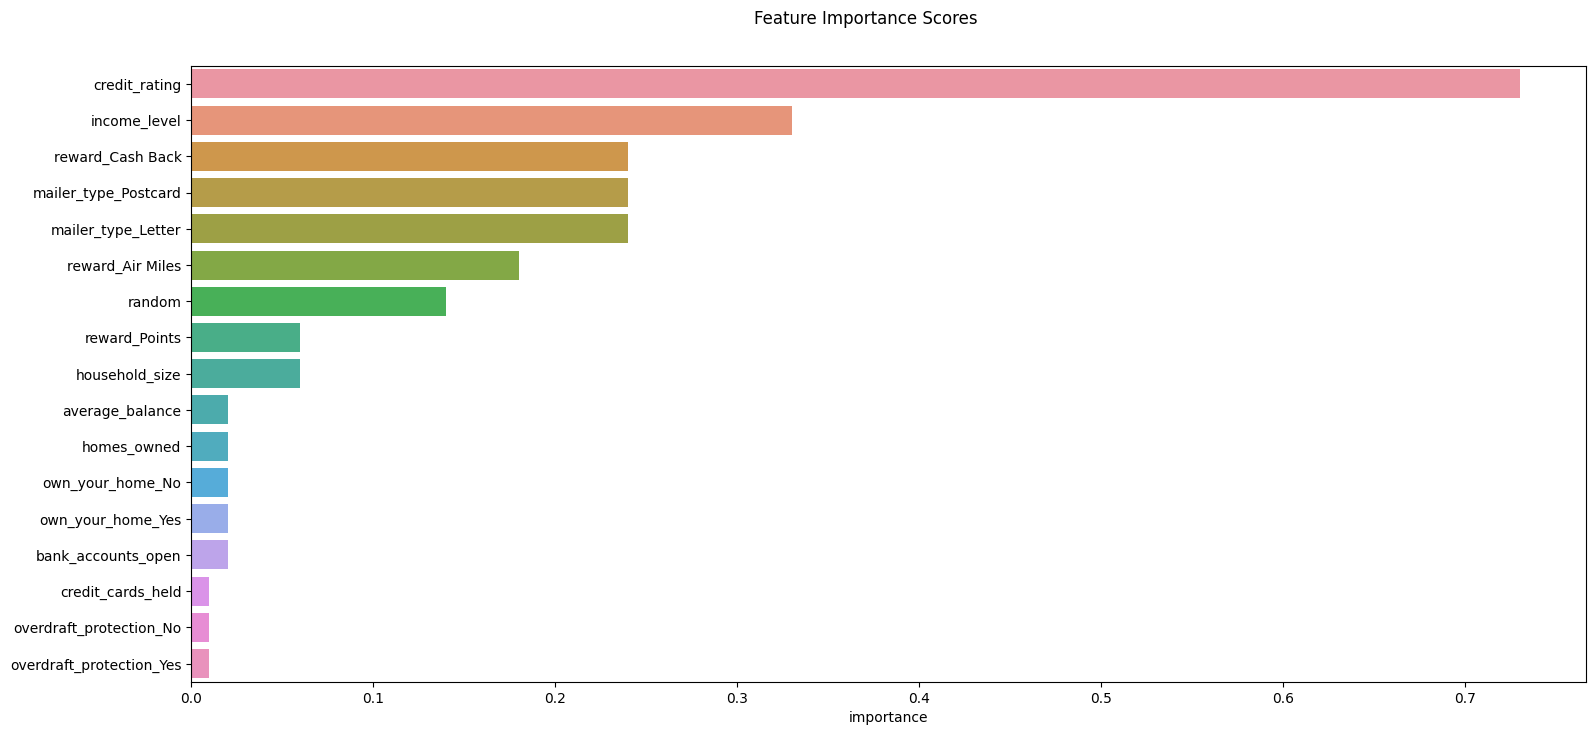

In [77]:
plot_importance(importance_log_avg)

In [78]:
log_avg_metrics = metrics_class(yavg_test, log_pred_avg)
log_avg_metrics

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cohen Kappa Score    0.00
Accuracy             0.94
Precision            0.00
Recall               0.00
F1                   0.00
AUC Score            0.50
dtype: float64

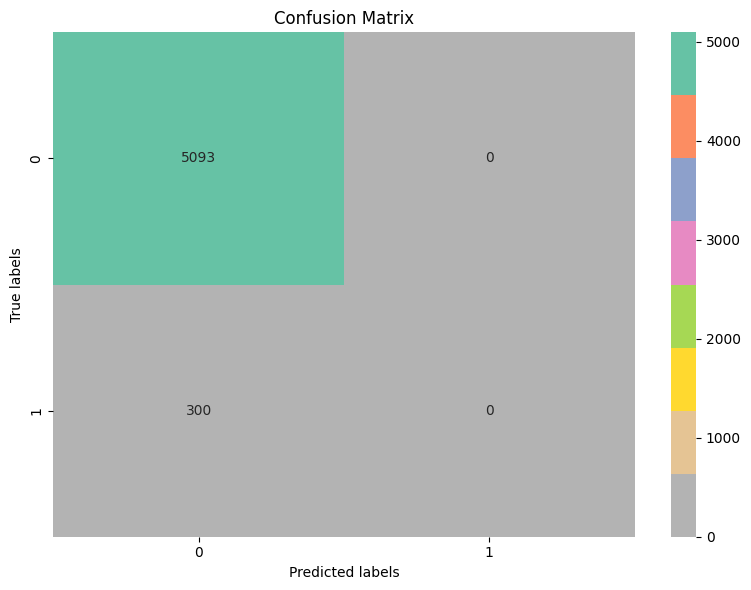

In [79]:
plot_cm(yavg_test, log_pred_avg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<Axes: xlabel='actual', ylabel='prediction'>

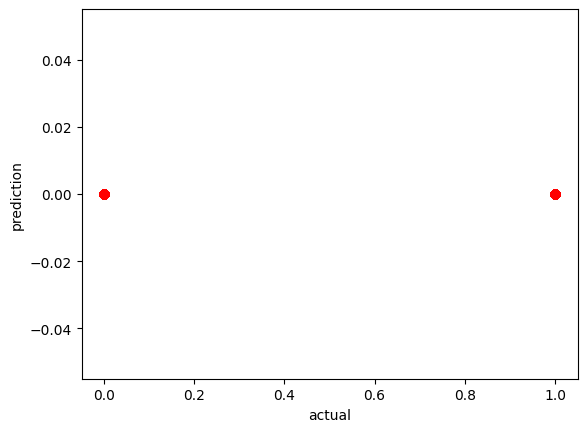

In [80]:
#plotting results
results = pd.DataFrame()
results['actual'] = yavg_test
results['prediction'] =  log_pred_avg
sns.regplot(x = results.actual, y = results.prediction, logistic=True, color='red')

### SMOTE Data

In [81]:
Xsm_train, Xsm_test, ysm_train, ysm_test = xy_split(X_sm, y_sm)

In [82]:
logsm_pred, importance_logsm = classify_log(X_sm, y_sm)
importance_logsm

,importance
credit_rating,0.90
income_level,0.47
reward_Cash Back,0.32
reward_Air Miles,0.26
mailer_type_Postcard,0.25
mailer_type_Letter,0.25
q1_balance,0.12
bank_accounts_open,0.07
q2_balance,0.07
reward_Points,0.06


In [83]:
logsm_metrics = metrics_class(ysm_test, logsm_pred)
logsm_metrics

Cohen Kappa Score    0.41
Accuracy             0.70
Precision            0.68
Recall               0.74
F1                   0.71
AUC Score            0.70
dtype: float64

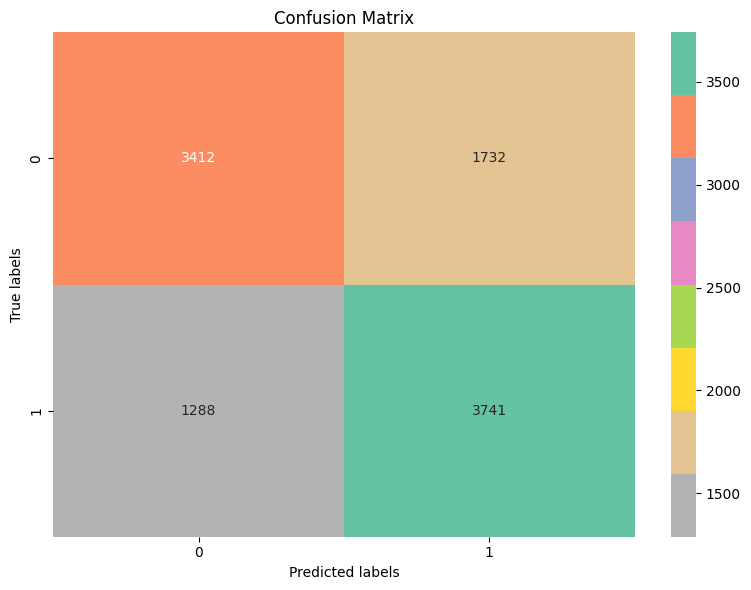

In [84]:
plot_cm(ysm_test, logsm_pred)

<Axes: xlabel='actual', ylabel='prediction'>

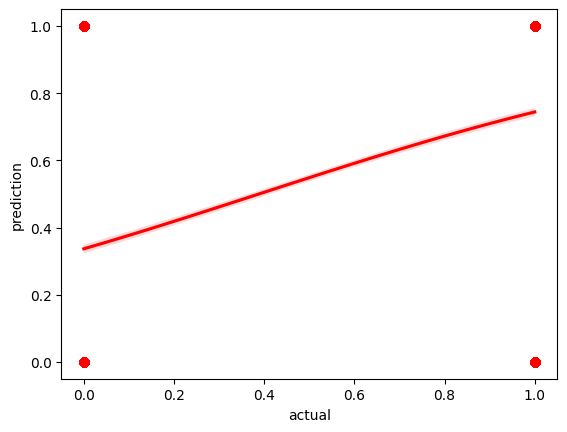

In [97]:
#plotting results
results = pd.DataFrame()
results['actual'] = ysm_test
results['prediction'] =  logsm_pred
sns.regplot(x = results.actual, y = results.prediction, color='red', logistic = True)

#### SMOTE Data, X Variation: No Quarterly Balance

In [85]:
Xsmavg_train, Xsmavg_test, ysmavg_train, ysmavg_test = xy_split(Xsm_avgbal, y_sm)

In [86]:
logsm_avg_pred, importance_logsm_avg = classify_log(Xsm_avgbal, y_sm)
importance_logsm_avg

,importance
credit_rating,0.90
income_level,0.47
reward_Cash Back,0.32
reward_Air Miles,0.26
mailer_type_Postcard,0.25
mailer_type_Letter,0.25
bank_accounts_open,0.08
average_balance,0.08
reward_Points,0.06
homes_owned,0.05


In [87]:
logsm_avg_metrics = metrics_class(ysmavg_test, logsm_avg_pred)
logsm_avg_metrics

Cohen Kappa Score    0.41
Accuracy             0.70
Precision            0.68
Recall               0.74
F1                   0.71
AUC Score            0.70
dtype: float64

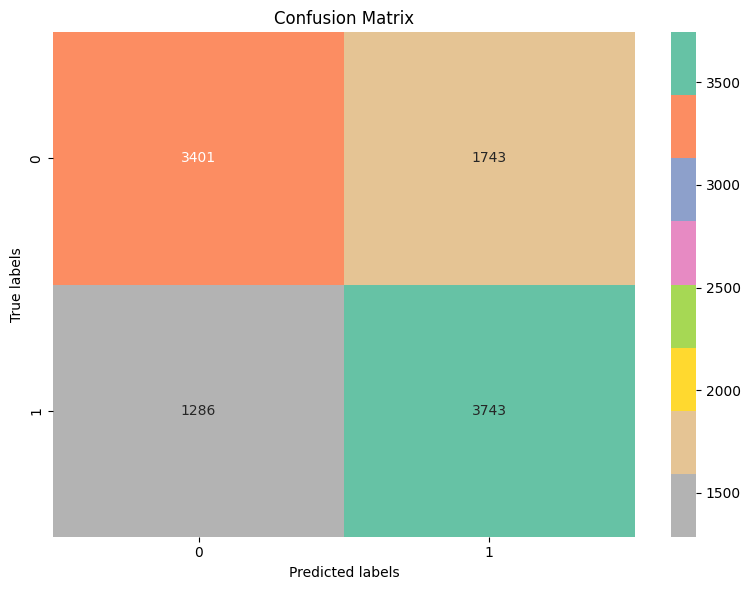

In [88]:
plot_cm(ysmavg_test, logsm_avg_pred)

In [89]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(yavg_test, log_pred_avg, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(ysm_test, logsm_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(ysmavg_test, logsm_avg_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

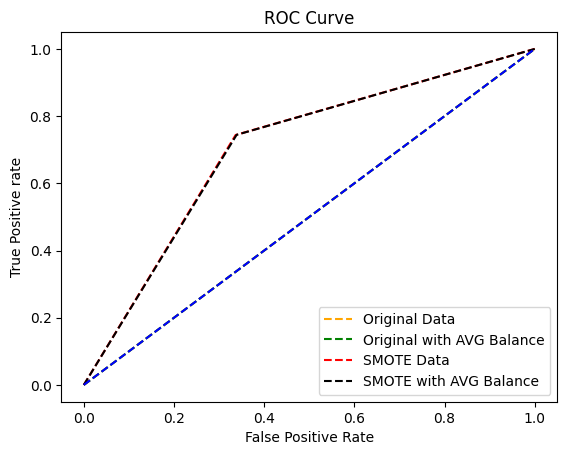

In [90]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Original Data')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Original with AVG Balance')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SMOTE Data')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='SMOTE with AVG Balance')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC Curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_original',dpi=300)
plt.show();